In [1]:
## working on finalizing a model given reduced set of data columns.
from datetime import datetime, timedelta
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy.stats as stats
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline

import networkx as nx
from networkx.algorithms.components.connected import connected_components

%matplotlib notebook
%timeit

#show up to 100 columns.
pd.set_option('display.max_columns', 100, 'display.max_rows', 200)

In [2]:
## load pickle file with reduced data columns
file_name = 'theorem_reduced_2.pkl'
reduced_data = pd.read_pickle(file_name)

In [3]:
reduced_data.head()

,Cancelled,BoolPriorProsperLoanee,DolLoanAmountRequested,BorrowerRate,NumMonthsTerm,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,NumMonthsEmployed,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,DolTotalBalanceOnPublicRecords,NumRealEstateTrades,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,PctBankcardUtil,NumTotalInquiries,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,
973605,1,False,15000.0,0.1620,60,6000.0000,0.27,Employed,445.0,NaN,NaN,0,False,1,0,0,2,1242,0,0,0,0,0.97,5,13901
981099,1,False,15000.0,0.1585,60,7916.6667,0.35,Other,32.0,NaN,NaN,0,False,1,0,0,2,2289,0,0,0,0,0.48,3,14238
1025766,0,True,4000.0,0.2085,36,2083.3333,0.53,Employed,4.0,0.0,NaN,0,False,0,0,0,0,911,0,0,0,0,0.93,5,4146
1003835,1,False,10000.0,0.1299,36,3750.0000,0.14,Employed,2.0,NaN,NaN,0,False,1,0,0,0,223,0,0,0,0,0.26,1,2942
1011335,0,True,20000.0,0.1440,60,9000.0000,0.16,Employed,90.0,0.0,NaN,0,False,1,0,1249,1,1264,1,2,0,0,0.81,17,8329


In [4]:
## should booleans be converted with standard scaler?
m1 = linear_model.LogisticRegression()
x1 = reduced_data['BoolPriorProsperLoanee'].to_frame()
y = reduced_data['Cancelled']
m1.fit(x1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
m2 = linear_model.LogisticRegression()
standard_scaler = preprocessing.StandardScaler()
x2 = standard_scaler.fit_transform(x1)
m2.fit(x2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
m3 = linear_model.LogisticRegression()
robust_scaler = preprocessing.RobustScaler()
x3 = robust_scaler.fit_transform(x1)
m3.fit(x3,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
print(m1.coef_)
print(m2.coef_)
print(m3.coef_)
print(m1.intercept_)
print(m2.intercept_)
print(m3.intercept_)

[[-1.24148665]]
[[-0.30515356]]
[[-1.24148665]]
[-0.62693258]
[-0.7070492]
[-0.62693258]


In [8]:
print(m1.predict_proba(x1.min()))
print(m1.predict_proba(x1.max()))
print(m2.predict_proba(x2.min()))
print(m2.predict_proba(x2.max()))
print(m3.predict_proba(x3.min()))
print(m3.predict_proba(x3.max()))

[[ 0.65179361  0.34820639]]
[[ 0.86627526  0.13372474]]
[[ 0.65178852  0.34821148]]
[[ 0.86634409  0.13365591]]
[[ 0.65179361  0.34820639]]
[[ 0.86627526  0.13372474]]


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


A sanity check: Using RobustScaler and StandardScaler on a boolean variable makes a very minimal difference.

In [9]:
## let's try throwing in two variables and see what happens.
mm = linear_model.LogisticRegression()
standard_scaler = preprocessing.StandardScaler()
robust_scaler = preprocessing.RobustScaler()
x = reduced_data[['BoolPriorProsperLoanee','DolLoanAmountRequested']]
x_s = standard_scaler.fit_transform(x)
y = reduced_data['Cancelled']
mm.fit(x_s,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
mm.coef_

array([[-0.30160269,  0.15214037]])

In [11]:
xx, yy = np.mgrid[-4:4:.01, -4:4:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = mm.predict_proba(grid)[:, 1].reshape(xx.shape)

<IPython.core.display.Javascript object>


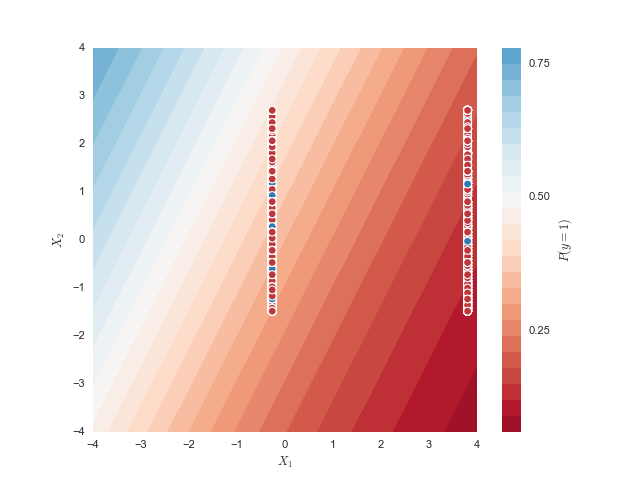

[(-4, 4),
 (-4, 4),
 None]

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(x_s[100:,0], x_s[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-4, 4), ylim=(-4, 4),
       xlabel="$X_1$", ylabel="$X_2$")

Plot above reveals that when first-time loanees request large loans, they are more likely to wind up canceling.

In [13]:
## let's start plotting some ROC curves and see if adding variables is improving our skill.

<IPython.core.display.Javascript object>


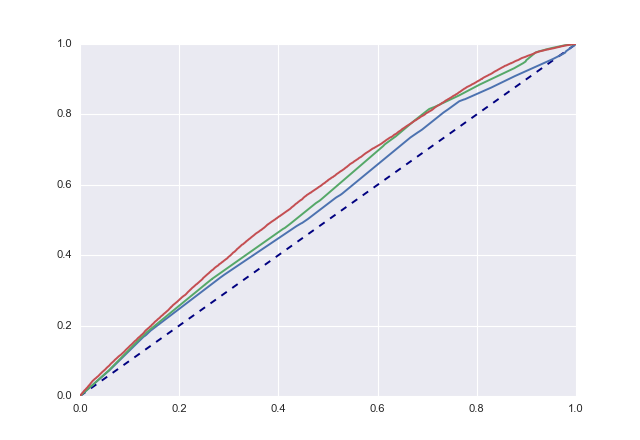

[[ 0.63779709  0.36220291]
 [ 0.69954269  0.30045731]
 [ 0.68410653  0.31589347]
 [ 0.71030059  0.28969941]
 [ 0.66133791  0.33866209]
 [ 0.63779709  0.36220291]
 [ 0.70171246  0.29828754]
 [ 0.71453931  0.28546069]
 [ 0.68410653  0.31589347]
 [ 0.71242461  0.28757539]
 [ 0.66133791  0.33866209]
 [ 0.56352391  0.43647609]
 [ 0.66133791  0.33866209]
 [ 0.71030059  0.28969941]
 [ 0.71030059  0.28969941]
 [ 0.6473005   0.3526995 ]
 [ 0.71030059  0.28969941]
 [ 0.70171246  0.29828754]
 [ 0.68410653  0.31589347]
 [ 0.61357605  0.38642395]]
[[ 0.16317715]]


//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


[[ 0.62441621  0.37558379]
 [ 0.68554464  0.31445536]
 [ 0.67020291  0.32979709]
 [ 0.6962626   0.3037374 ]
 [ 0.64764859  0.35235141]
 [ 0.62441621  0.37558379]
 [ 0.68770461  0.31229539]
 [ 0.70049164  0.29950836]
 [ 0.67020291  0.32979709]
 [ 0.69838133  0.30161867]
 [ 0.64764859  0.35235141]
 [ 0.55161163  0.44838837]
 [ 0.64764859  0.35235141]
 [ 0.6962626   0.3037374 ]
 [ 0.6962626   0.3037374 ]
 [ 0.63378496  0.36621504]
 [ 0.6962626   0.3037374 ]
 [ 0.68770461  0.31229539]
 [ 0.67020291  0.32979709]
 [ 0.60059667  0.39940333]]
[[-0.30253921  0.15834587]]
[[ 0.58666446  0.41333554]
 [ 0.72833835  0.27166165]
 [ 0.68351871  0.31648129]
 [ 0.64850069  0.35149931]
 [ 0.70066688  0.29933312]
 [ 0.6087822   0.3912178 ]
 [ 0.68027871  0.31972129]
 [ 0.68995618  0.31004382]
 [ 0.69216089  0.30783911]
 [ 0.68277666  0.31722334]
 [ 0.70066688  0.29933312]
 [ 0.52569862  0.47430138]
 [ 0.66328552  0.33671448]
 [ 0.73286698  0.26713302]
 [ 0.70975902  0.29024098]
 [ 0.60631596  0.39368404]

In [14]:
variables = [['DolLoanAmountRequested'],['BoolPriorProsperLoanee','DolLoanAmountRequested'],\
       ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil']]
#            ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil','NumTotalInquiries']]

y = reduced_data['Cancelled']
X = []
X_train = []
X_test = []
y_train = []
y_test = []

fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

for i,v in enumerate(variables):
    standard_scaler = preprocessing.StandardScaler()
    X.append(standard_scaler.fit_transform(reduced_data[v]))
    X_tr, X_te, y_tr, y_te = train_test_split(X[i], y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    print(probs[:20])
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    plt.legend()
    print(logm.coef_)

In [135]:
## the one thing about these loans is that only 6.5% of them are from previous loanees - so we don't learn a lot in the
## case of most loans.
reduced_data['BoolPriorProsperLoanee'].value_counts(normalize = True)

False    0.935481
True     0.064519
Name: BoolPriorProsperLoanee, dtype: float64

Pretty cool - this series of ROC curves shows that starting with DolLoanAmountRequested, then adding BoolPriorProsperLoanee, then PctBankcardUtil, all make successive contributions to quality of fit.

On the other hand, adding NumTotalInquiries makes no perceptable impact on the resulting ROC curve.

In [15]:
## important step...let's test the treatment of the categorical variable.
reduced_data['StrEmploymentStatus'].replace(['Part-time','Not employed'],'Other',inplace = True)
X_test = reduced_data['StrEmploymentStatus'].to_frame()
X_dummies = pd.get_dummies(X_test)

m_dummies = linear_model.LogisticRegression()
m_dummies.fit(X_dummies,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [158]:
X_dummies.head()

,StrEmploymentStatus_Employed,StrEmploymentStatus_Full-time,StrEmploymentStatus_Other,StrEmploymentStatus_Self-employed
ListingNumber,,,,
973605,1,0,0,0
981099,0,0,1,0
1025766,1,0,0,0
1003835,1,0,0,0
1011335,1,0,0,0


In [154]:
m_dummies.coef_

array([[-0.00222737, -0.72691812,  0.68551476, -0.6631983 ]])

<IPython.core.display.Javascript object>


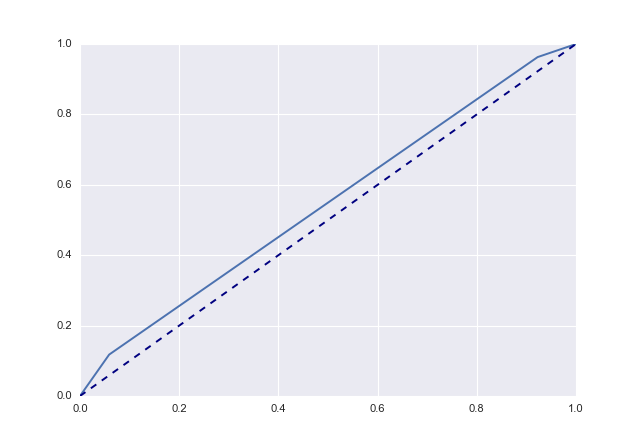

In [157]:
X_tr, X_te, y_tr, y_te = train_test_split(X_dummies, y, test_size=0.3, random_state=0)
probs = m_dummies.predict_proba(X_te)

fig, ax = plt.subplots()
fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


In [185]:
variables = ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil']

y = reduced_data['Cancelled']
X = reduced_data[variables]
X_full = pd.concat([X,X_dummies], axis=1)

<IPython.core.display.Javascript object>


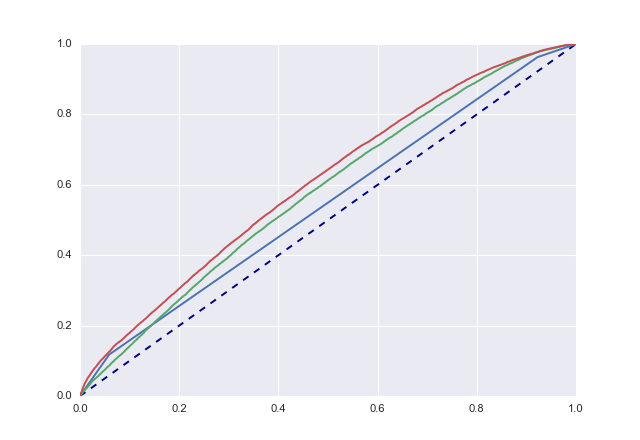

[[ 0.00223078 -0.75684759  0.67767825 -0.63696438]]
[[-0.30678644  0.16329316 -0.1515659 ]]
[[-0.30072478  0.1711396  -0.15424153 -0.02124451 -0.02022657  0.17427729
  -0.15844917]]


In [186]:
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

standard_scaler1 = preprocessing.StandardScaler()
X_s = standard_scaler1.fit_transform(X)

standard_scaler2 = preprocessing.StandardScaler()
X_full_s = standard_scaler2.fit_transform(X_full)

for X in [X_dummies, X_s, X_full_s]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)

Adding job type notably increases area under curve, especially at the fringes - again, small sub-populations (like
those who respond 'other' as job status) where we're able to make much stronger predictions.

<IPython.core.display.Javascript object>


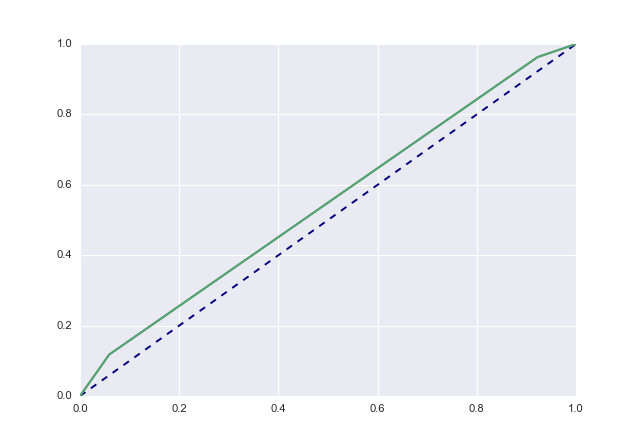

[[ 0.00223078 -0.75684759  0.67767825 -0.63696438]]
[[-0.76188468  0.67544848 -0.63919356]]


In [178]:
## let's test further if dropping one of the columns makes a difference...probably should not
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

Xd1 = X_dummies
Xd2 = Xd1.drop('StrEmploymentStatus_Employed', axis=1)

for X in [Xd1, Xd2]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)

<IPython.core.display.Javascript object>


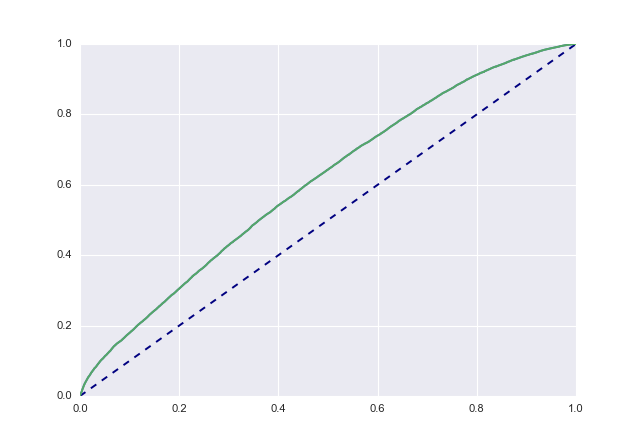

[[-0.30072478  0.1711396  -0.15424153 -0.02124451 -0.02022657  0.17427729
  -0.15844917]]
[[-0.30072244  0.17113163 -0.15423595 -0.01721943  0.19055501 -0.14377294]]


In [184]:
## let's test further if dropping one of the columns makes a difference...probably should not
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

Xf1 = X_full_s
X_temp = X_full.drop('StrEmploymentStatus_Employed', axis = 1)
ssc = preprocessing.StandardScaler()
Xf2 = ssc.fit_transform(X_temp)

for X in [Xf1, Xf2]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)

In [189]:
reduced_data.isnull().any()

Cancelled                           False
BoolPriorProsperLoanee              False
DolLoanAmountRequested              False
BorrowerRate                        False
NumMonthsTerm                       False
DolMonthlyIncome                    False
FracDebtToIncomeRatio                True
StrEmploymentStatus                 False
NumMonthsEmployed                    True
NumPriorProsperLoansLatePayments     True
NumPriorProsperLoans61dpd            True
BoolIsLender                        False
BoolInGroup                         False
NumTradesOpened6                    False
NumOpenTradesDelinqOrPastDue6       False
DolTotalBalanceOnPublicRecords      False
NumRealEstateTrades                 False
DolMonthlyDebt                      False
NumCurrentDelinquencies             False
NumPublicRecordsLast10Years         False
NumPublicRecords12                  False
DolAmountDelinquent                 False
PctBankcardUtil                     False
NumTotalInquiries                 

In [213]:
## let's look specifically at cases where FracDebtToIncomeRatio unknown...
## answer immediately pops out - it's because they're self-employed!
reduced_data[reduced_data['FracDebtToIncomeRatio'].isnull()]

,Cancelled,BoolPriorProsperLoanee,DolLoanAmountRequested,BorrowerRate,NumMonthsTerm,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,NumMonthsEmployed,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,DolTotalBalanceOnPublicRecords,NumRealEstateTrades,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,PctBankcardUtil,NumTotalInquiries,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,
1029573,0,True,15000.0,0.0809,36,6250.0000,NaN,Self-employed,9.0,0.0,NaN,1,False,1,0,0,2,1488,0,1,0,0,0.00,8,11010
1026668,1,False,4000.0,0.2304,36,1833.3333,NaN,Self-employed,259.0,NaN,NaN,0,False,0,0,0,1,220,0,1,0,0,0.56,1,7105
1055942,0,False,8000.0,0.2080,60,11166.6667,NaN,Self-employed,45.0,NaN,NaN,0,False,1,0,0,0,1099,0,1,0,0,0.59,5,7573
1112163,0,False,15000.0,0.1765,36,10000.0000,NaN,Self-employed,104.0,NaN,NaN,0,False,0,0,0,0,912,0,0,0,0,0.53,5,5348
1034365,0,False,15000.0,0.1655,60,10000.0000,NaN,Self-employed,50.0,NaN,NaN,0,False,0,0,0,0,1292,0,1,0,0,0.37,4,4535
1042273,0,False,4000.0,0.2694,60,2000.0000,NaN,Self-employed,47.0,NaN,NaN,0,False,0,0,0,1,410,0,2,0,0,0.55,6,11315
1063466,0,False,4000.0,0.2304,36,3333.3333,NaN,Self-employed,215.0,NaN,NaN,0,False,1,0,0,1,302,0,1,0,0,0.68,5,7202
1066280,0,True,10000.0,0.0809,60,7916.6667,NaN,Self-employed,20.0,0.0,NaN,1,False,0,0,0,1,657,0,0,0,0,0.00,1,5625
1047370,0,False,15000.0,0.0809,36,12500.0000,NaN,Self-employed,27.0,NaN,NaN,0,False,0,0,0,3,2489,0,0,0,0,0.56,4,10883


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


DolMonthlyDebt               0
DolMonthlyIncome             0
FracDebtToIncomeRatio    15607
PreliminaryDTI               0
frac                     15608
dtype: int64
8.91935483871
0.6932558700618643
0.15203597840598992


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


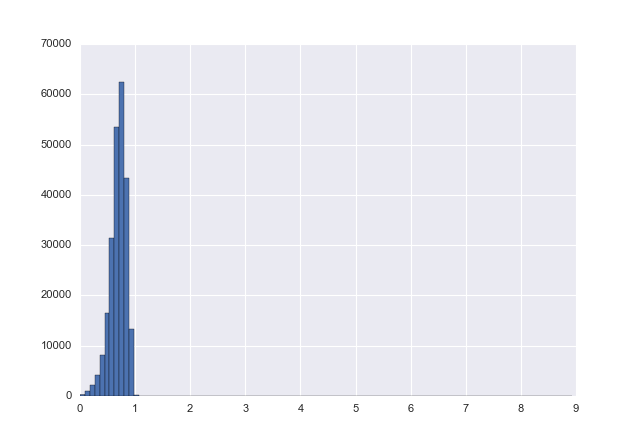

In [284]:
#['DolMonthlyDebt','DolMonthlyIncome','FracDebtToIncomeRatio']
test_df = reduced_data[['DolMonthlyDebt','DolMonthlyIncome','FracDebtToIncomeRatio']]
test_df['PreliminaryDTI'] = test_df['DolMonthlyDebt']/test_df['DolMonthlyIncome']
test_df['frac'] = test_df['PreliminaryDTI']/test_df['FracDebtToIncomeRatio']
print(test_df.isnull().sum())
test_df.replace([np.inf, -np.inf], np.nan, inplace = True)
print(test_df['frac'].max())
print(test_df['frac'].mean())
print(test_df['frac'].std())

fig,ax = plt.subplots()
test_df['frac'].hist(bins = 100)

In [286]:
test_df['EstimatedDebtToIncomeRatio'] = test_df['FracDebtToIncomeRatio']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [287]:
test_df.ix[np.isnan(test_df.EstimatedDebtToIncomeRatio), 'EstimatedDebtToIncomeRatio'] = test_df['PreliminaryDTI']/.6933

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [292]:
test_df['EstimatedDebtToIncomeRatio']

ListingNumber
973605     0.270000
981099     0.350000
1025766    0.530000
1003835    0.140000
1011335    0.160000
1010105    0.450000
1029573    0.343401
1014296    0.160000
1009580    0.150000
743482     0.280000
1013984    0.130000
991147     0.130000
996748     0.290000
1020431    0.250000
1036179    0.290000
1036020    0.240000
1038345    0.270000
1042284    0.320000
1004506    0.130000
1004863    0.280000
1008013    0.300000
1026668    0.173085
1012066    0.360000
1061826    0.180000
1055967    0.240000
1041188    0.300000
1042166    0.250000
1061793    0.360000
1018846    0.170000
1037213    0.370000
1037621    0.310000
1022602    0.320000
1041389    0.270000
1022788    0.310000
1046219    0.270000
1065582    0.330000
1067823    0.630000
1065351    0.220000
1071696    0.060000
1112078    0.210000
1072737    0.290000
1051319    0.340000
1048103    0.230000
1066290    0.170000
1055942    0.141956
1028164    0.410000
1072321    0.330000
1052207    0.210000
1112163    0.131545
105265

In [291]:
.0829*1.4424

0.11957496

In [279]:
test_df.head()

,DolMonthlyDebt,DolMonthlyIncome,FracDebtToIncomeRatio,PreliminaryDTI,frac,EstimatedDebtToIncomeRatio
ListingNumber,,,,,,
973605,1242,6000.0000,0.27,0.207000,0.766667,0.27
981099,2289,7916.6667,0.35,0.289137,0.826105,0.35
1025766,911,2083.3333,0.53,0.437280,0.825057,0.53
1003835,223,3750.0000,0.14,0.059467,0.424762,0.14
1011335,1264,9000.0000,0.16,0.140444,0.877778,0.16


Lessons learned: DolMonthlyIncome is a poor predictor of cancellation, but both DolMonthlyDebt and my new variable EstimatedDebtToIncomeRatio are pretty good predictors on their own.

In combination, DolMonthlyDebt and DolMonthlyIncome are actually a pretty strong predictor pair. In fact, no additional skill is gained from adding EstimatedDebtToIncomeRatio!

All a roundabout way of saying...get rid of FracDebtToIncomeRatio, keep DolMonthlyDebt and DolMonthlyIncome.

<IPython.core.display.Javascript object>


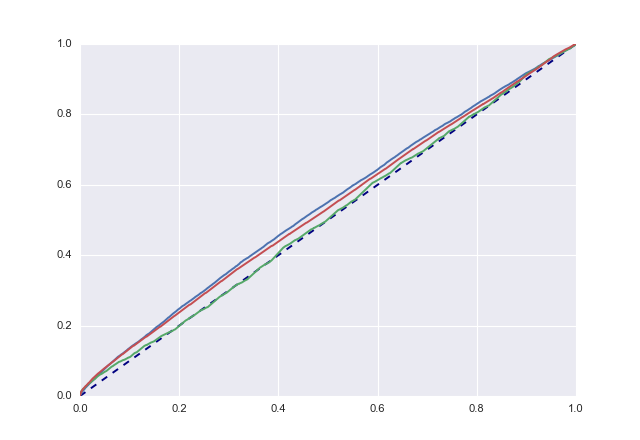

[[-0.00013843]]
[[  2.59108580e-06]]
[[-0.41007374]]


In [304]:
cols_debt_income = [['DolMonthlyDebt'],['DolMonthlyIncome'],['EstimatedDebtToIncomeRatio']]

## let's test further if dropping one of the columns makes a difference...probably should not
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

for cols in cols_debt_income:
    X = test_df[cols]
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)

<IPython.core.display.Javascript object>


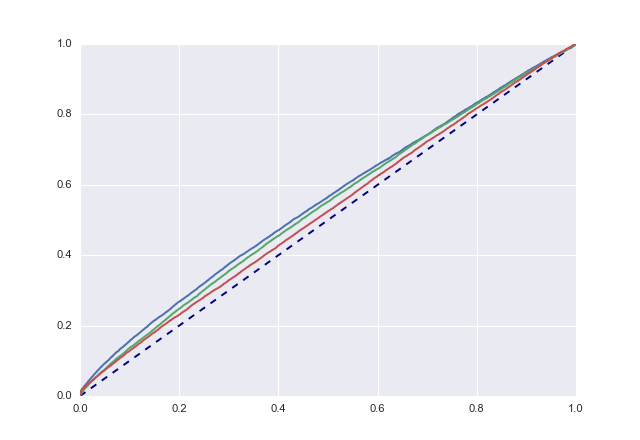

[[ -2.03352998e-04   1.80366695e-05]]
[[-0.0001316  -0.09274625]]
[[  3.28953809e-06  -1.73600887e-01]]


In [305]:
cols_debt_income = [['DolMonthlyDebt','DolMonthlyIncome'],\
      ['DolMonthlyDebt','EstimatedDebtToIncomeRatio'],\
      ['DolMonthlyIncome','EstimatedDebtToIncomeRatio']]

## let's test further if dropping one of the columns makes a difference...probably should not
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

for cols in cols_debt_income:
    X = test_df[cols]
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)

<IPython.core.display.Javascript object>


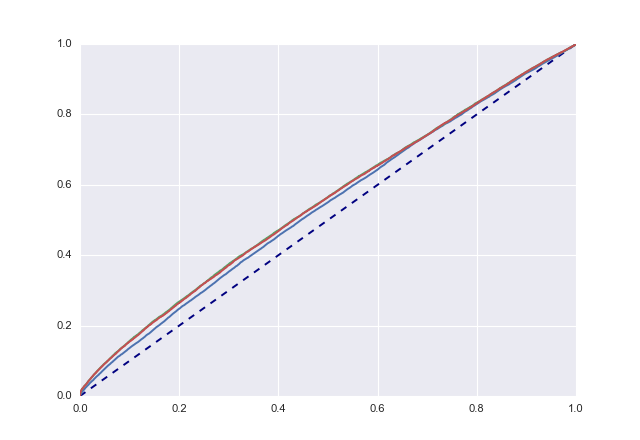

[[-0.00013843]]
[[ -2.03352998e-04   1.80366695e-05]]
[[ -1.93526489e-04   1.68784012e-05  -9.05197942e-02]]


In [303]:
#cols_debt_income = [['DolMonthlyDebt'],['DolMonthlyIncome'],['EstimatedDebtToIncomeRatio']]
#cols_debt_income = [['DolMonthlyDebt','DolMonthlyIncome'],\
#      ['DolMonthlyDebt','EstimatedDebtToIncomeRatio'],\
#      ['DolMonthlyIncome','EstimatedDebtToIncomeRatio']]
#     ['DolMonthlyDebt','DolMonthlyIncome','EstimatedDebtToIncomeRatio']]
cols_debt_income = [['DolMonthlyDebt'],['DolMonthlyDebt','DolMonthlyIncome'],\
                   ['DolMonthlyDebt','DolMonthlyIncome','EstimatedDebtToIncomeRatio']]

## let's test further if dropping one of the columns makes a difference...probably should not
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

for cols in cols_debt_income:
    X = test_df[cols]
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)

In [214]:
reduced_data[reduced_data['DolMonthlyIncome']==0]

,Cancelled,BoolPriorProsperLoanee,DolLoanAmountRequested,BorrowerRate,NumMonthsTerm,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,NumMonthsEmployed,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,DolTotalBalanceOnPublicRecords,NumRealEstateTrades,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,PctBankcardUtil,NumTotalInquiries,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,
1662531,1,False,15000.0,0.1605,60,0.0,0.30,Other,NaN,NaN,NaN,0,False,1,0,0,1,1259,0,0,0,0,0.50,11,14372
2293049,0,False,3000.0,0.0605,36,0.0,0.31,Other,NaN,NaN,NaN,0,False,1,0,0,2,806,0,0,0,0,0.03,0,10997
2396911,0,False,2000.0,0.1880,36,0.0,0.30,Other,NaN,NaN,NaN,0,False,1,0,0,0,394,1,1,0,570,0.79,5,6657
2493811,1,False,18000.0,0.2095,60,0.0,0.50,Other,NaN,NaN,NaN,0,False,0,0,0,4,1246,2,0,0,93,0.40,3,11591


In [207]:
test_df['dti'].min()

0.0

In [204]:
np.nanmean(test_df['frac'])

inf

In [203]:
reduced_data['DolMonthlyIncome'].max()

10000000.0

In [306]:
reduced_data.head()

,Cancelled,BoolPriorProsperLoanee,DolLoanAmountRequested,BorrowerRate,NumMonthsTerm,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,NumMonthsEmployed,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,DolTotalBalanceOnPublicRecords,NumRealEstateTrades,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,PctBankcardUtil,NumTotalInquiries,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,
973605,1,False,15000.0,0.1620,60,6000.0000,0.27,Employed,445.0,NaN,NaN,0,False,1,0,0,2,1242,0,0,0,0,0.97,5,13901
981099,1,False,15000.0,0.1585,60,7916.6667,0.35,Other,32.0,NaN,NaN,0,False,1,0,0,2,2289,0,0,0,0,0.48,3,14238
1025766,0,True,4000.0,0.2085,36,2083.3333,0.53,Employed,4.0,0.0,NaN,0,False,0,0,0,0,911,0,0,0,0,0.93,5,4146
1003835,1,False,10000.0,0.1299,36,3750.0000,0.14,Employed,2.0,NaN,NaN,0,False,1,0,0,0,223,0,0,0,0,0.26,1,2942
1011335,0,True,20000.0,0.1440,60,9000.0000,0.16,Employed,90.0,0.0,NaN,0,False,1,0,1249,1,1264,1,2,0,0,0.81,17,8329


In [19]:
v1 = ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil']
v2 = ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil','DolMonthlyDebt','DolMonthlyIncome']

y = reduced_data['Cancelled']
X1 = reduced_data[v1]
X2 = reduced_data[v2]
X1_full = pd.concat([X1,X_dummies], axis=1)
X2_full = pd.concat([X2,X_dummies], axis=1)

<IPython.core.display.Javascript object>


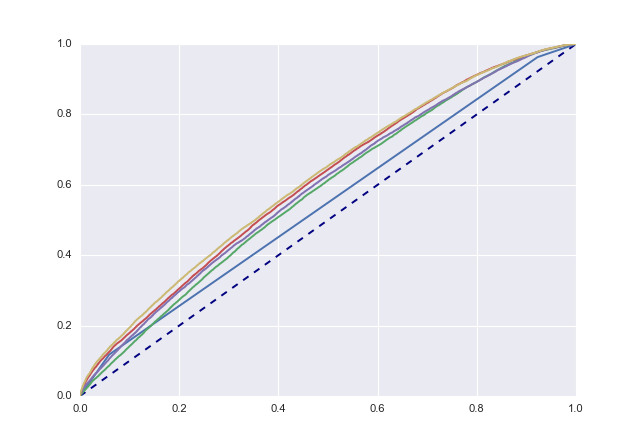

[[ 0.00223078 -0.75684759  0.67767825 -0.63696438]]
[[-0.30678644  0.16329316 -0.1515659 ]]
[[-0.30072478  0.1711396  -0.15424153 -0.02124451 -0.02022657  0.17427729
  -0.15844917]]
[[-0.29254337  0.1979339  -0.12624169 -0.1606891   0.28285296]]
[[-0.28830317  0.1968249  -0.13185078 -0.14862107  0.34991002 -0.01997185
  -0.01937201  0.17228927 -0.15826079]]


In [20]:
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

ssc1 = preprocessing.StandardScaler()
ssc2 = preprocessing.StandardScaler()
ssc3 = preprocessing.StandardScaler()
ssc4 = preprocessing.StandardScaler()
X1_s = ssc1.fit_transform(X1)
X2_s = ssc2.fit_transform(X2)
X1_full_s = ssc3.fit_transform(X1_full)
X2_full_s = ssc4.fit_transform(X2_full)

for X in [X_dummies, X1_s, X1_full_s, X2_s, X2_full_s]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)

In [315]:
reduced_data[:20]

,Cancelled,BoolPriorProsperLoanee,DolLoanAmountRequested,BorrowerRate,NumMonthsTerm,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,NumMonthsEmployed,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,DolTotalBalanceOnPublicRecords,NumRealEstateTrades,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,PctBankcardUtil,NumTotalInquiries,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,
973605,1,False,15000.0,0.1620,60,6000.0000,0.27,Employed,445.0,NaN,NaN,0,False,1,0,0,2,1242,0,0,0,0,0.97,5,13901
981099,1,False,15000.0,0.1585,60,7916.6667,0.35,Other,32.0,NaN,NaN,0,False,1,0,0,2,2289,0,0,0,0,0.48,3,14238
1025766,0,True,4000.0,0.2085,36,2083.3333,0.53,Employed,4.0,0.0,NaN,0,False,0,0,0,0,911,0,0,0,0,0.93,5,4146
1003835,1,False,10000.0,0.1299,36,3750.0000,0.14,Employed,2.0,NaN,NaN,0,False,1,0,0,0,223,0,0,0,0,0.26,1,2942
1011335,0,True,20000.0,0.1440,60,9000.0000,0.16,Employed,90.0,0.0,NaN,0,False,1,0,1249,1,1264,1,2,0,0,0.81,17,8329
1010105,0,False,10000.0,0.2225,36,8416.6667,0.45,Employed,125.0,NaN,NaN,0,False,0,0,0,2,3455,0,0,0,0,0.87,8,11042
1029573,0,True,15000.0,0.0809,36,6250.0000,NaN,Self-employed,9.0,0.0,NaN,1,False,1,0,0,2,1488,0,1,0,0,0.00,8,11010
1014296,0,False,7000.0,0.0769,36,3333.3333,0.16,Employed,22.0,NaN,NaN,0,False,0,0,0,0,308,0,0,0,0,0.05,1,3880
1009580,0,False,5000.0,0.1314,36,6450.9167,0.15,Employed,268.0,NaN,NaN,0,False,2,0,0,3,846,0,1,0,0,0.82,8,9547


In [317]:
## let's add in the other two booleans with strong influence.
v3 = ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil','DolMonthlyDebt','DolMonthlyIncome',\
      'BoolIsLender','BoolInGroup']

In [324]:
X3 = pd.concat([reduced_data[v3],X_dummies], axis=1)

<IPython.core.display.Javascript object>


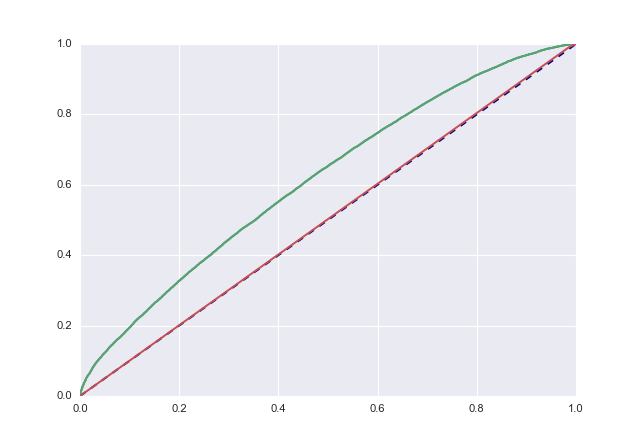

[[-0.28830317  0.1968249  -0.13185078 -0.14862107  0.34991002 -0.01997185
  -0.01937201  0.17228927 -0.15826079]]
0.616286190794
[[-1.18448882  0.29927328 -0.20494653 -0.16798725  0.04815277  0.04345581
   0.2398191   0.06350495 -0.29258307  0.76541822 -0.5363401 ]]
0.616224584314


In [325]:
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

rsc = preprocessing.RobustScaler()
ssc = preprocessing.StandardScaler()
X3_s = rsc.fit_transform(X3)

for X in [X2_full_s, X3_s]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)
    print(metrics.roc_auc_score(y_te, probs[:,1]))

In [323]:
reduced_data['BoolInGroup'].value_counts()

False    251804
True        665
Name: BoolInGroup, dtype: int64

In [322]:
reduced_data['BoolIsLender'].value_counts()

0    249330
1      3139
Name: BoolIsLender, dtype: int64

<IPython.core.display.Javascript object>


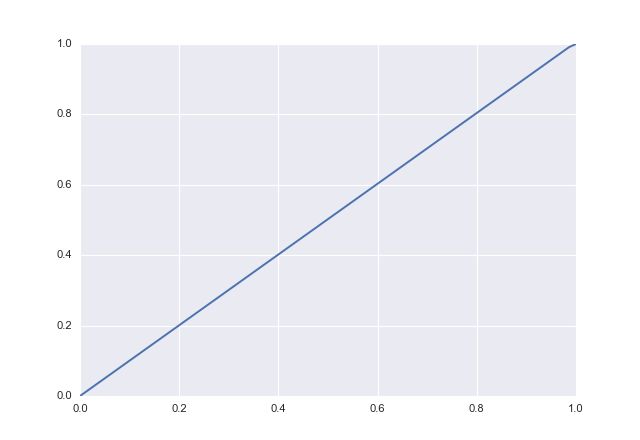

[[-0.49419859]]
0.50253007301
[[ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014]
 [ 0.66508986  0.33491014

In [330]:
X_lender = reduced_data['BoolIsLender'].to_frame()
X_tr, X_te, y_tr, y_te = train_test_split(X_lender, y, test_size=0.3, random_state=0)
logm = linear_model.LogisticRegression()
logm.fit(X_tr,y_tr)
probs = logm.predict_proba(X_te)
fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
fig, ax = plt.subplots()
plt.plot(fpr,tpr)
print(logm.coef_)
print(metrics.roc_auc_score(y_te, probs[:,1]))
print(probs[:200])

In [29]:
v3 = ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil','DolMonthlyDebt','DolMonthlyIncome',\
      'BorrowerRate']
X3 = pd.concat([reduced_data[v3],X_dummies], axis=1)

<IPython.core.display.Javascript object>


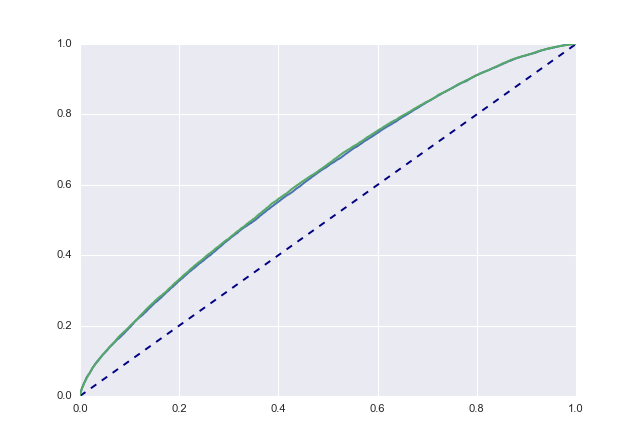

[[-0.28830317  0.1968249  -0.13185078 -0.14862107  0.34991002 -0.01997185
  -0.01937201  0.17228927 -0.15826079]]
0.616286190794
[[-0.28481846  0.2140983  -0.15345215 -0.15796579  0.37362016  0.08109587
  -0.01874342 -0.01981258  0.17388755 -0.16172216]]
0.619694583028


In [30]:
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

ssc = preprocessing.StandardScaler()
X3_s = ssc.fit_transform(X3)

for X in [X2_full_s, X3_s]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)
    print(metrics.roc_auc_score(y_te, probs[:,1]))

BorrowerRate doesn't look like it should do much, but the comparison of ROC curves above shows that it does make some difference to productivity. Specifically, a higher BorrowerRate is correlated with cancellation. I'm actually surprised this didn't turn out to be a bigger effect.

In [35]:
v4 = ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil','DolMonthlyDebt','DolMonthlyIncome',\
      'BorrowerRate','NumRealEstateTrades']
X4 = pd.concat([reduced_data[v4],X_dummies], axis=1)

<IPython.core.display.Javascript object>


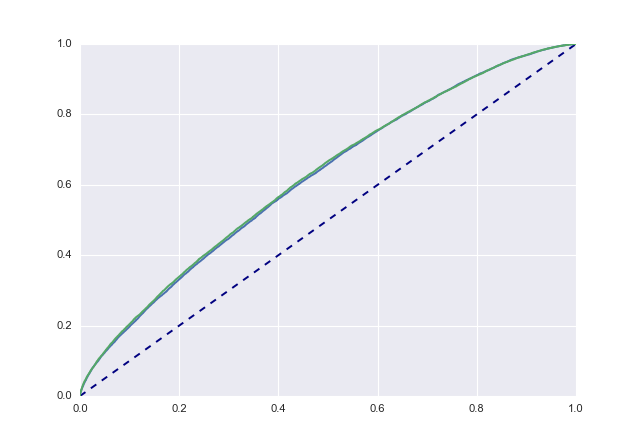

[[-0.28481846  0.2140983  -0.15345215 -0.15796579  0.37362016  0.08109587
  -0.01874342 -0.01981258  0.17388755 -0.16172216]]
0.619694583028
[[-0.28483716  0.2253451  -0.15113019 -0.14316928  0.41307171  0.07629983
  -0.09721096 -0.02038505 -0.01987256  0.17816365 -0.16407718]]
0.623279294467


In [36]:
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

ssc = preprocessing.StandardScaler()
X4_s = ssc.fit_transform(X4)

for X in [X3_s, X4_s]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)
    print(metrics.roc_auc_score(y_te, probs[:,1]))

Ran through variables checking for improvement including DaysSinceFirstCredit and NumMonthsTerm - minor effects.

NumRealEstateTrades surprisingly significant - coefficient actually larger than for BorrowerRate.

In [37]:
v5 = ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil','DolMonthlyDebt','DolMonthlyIncome',\
      'BorrowerRate','NumRealEstateTrades','NumTotalInquiries']
X5 = pd.concat([reduced_data[v5],X_dummies], axis=1)

<IPython.core.display.Javascript object>


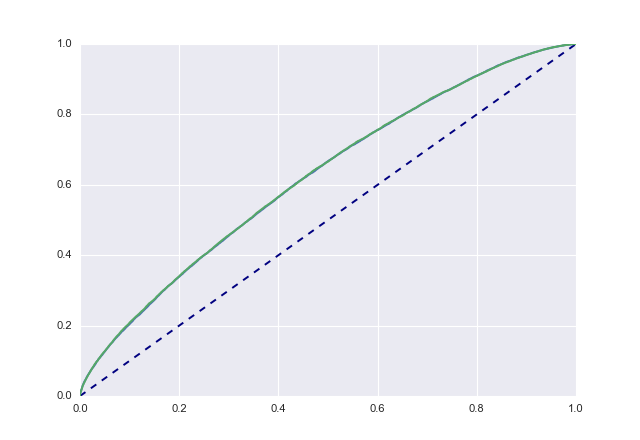

[[-0.28483716  0.2253451  -0.15113019 -0.14316928  0.41307171  0.07629983
  -0.09721096 -0.02038505 -0.01987256  0.17816365 -0.16407718]]
0.623279294467
[[-0.285832    0.22595255 -0.13913667 -0.14974141  0.39512506  0.06050908
  -0.10077639  0.0561233  -0.02175033 -0.02020504  0.17858063 -0.16249535]]
0.624090384141


In [39]:
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

ssc = preprocessing.StandardScaler()
X5_s = ssc.fit_transform(X5)

for X in [X4_s, X5_s]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)
    print(metrics.roc_auc_score(y_te, probs[:,1]))

NumTotalInquiries is pretty marginal in terms of improving predictivity, but the relation shown in the 1-1 logistic regression plot seems trustworthy - let's include it.

In [43]:
reduced_data[reduced_data['DolTotalBalanceOnPublicRecords']!=0]['Cancelled'].mean()

0.34695719443011863

In [50]:
reduced_data['NumCurrentDelinquencies'].value_counts()

0     213624
1      25365
2       7250
3       2647
4       1268
5        683
6        472
7        317
8        262
9        179
10       111
11        72
12        69
13        43
14        27
15        23
16        19
17        12
18         8
19         3
21         3
20         2
25         2
34         1
22         1
23         1
24         1
27         1
30         1
31         1
44         1
Name: NumCurrentDelinquencies, dtype: int64

In [51]:
v6 = ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil','DolMonthlyDebt','DolMonthlyIncome',\
      'BorrowerRate','NumRealEstateTrades','NumTotalInquiries','NumCurrentDelinquencies']
X6 = pd.concat([reduced_data[v6],X_dummies], axis=1)

<IPython.core.display.Javascript object>


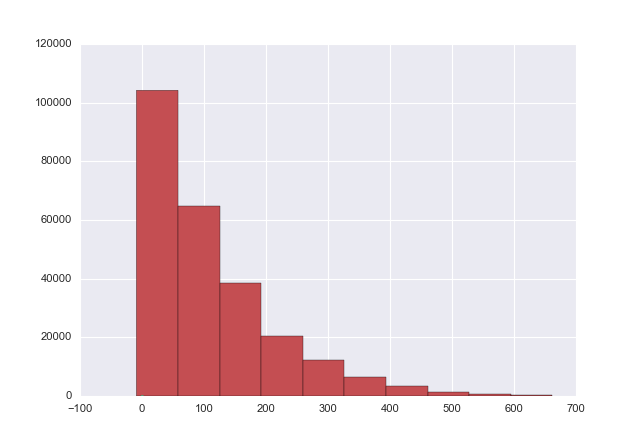

[[-0.285832    0.22595255 -0.13913667 -0.14974141  0.39512506  0.06050908
  -0.10077639  0.0561233  -0.02175033 -0.02020504  0.17858063 -0.16249535]]
0.624090384141
[[-0.28598477  0.22443367 -0.14070379 -0.1520187   0.40044744  0.06356384
  -0.09925875  0.05693343 -0.02741292 -0.02164752 -0.01977366  0.17900531
  -0.16320349]]
0.624441781054


In [53]:
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

ssc = preprocessing.StandardScaler()
X6_s = ssc.fit_transform(X6)

for X in [X5_s, X6_s]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)
    print(metrics.roc_auc_score(y_te, probs[:,1]))

NumCurrentDelinquences and DolTotalBalanceOnPublicRecords test out to be pretty minor.

<IPython.core.display.Javascript object>


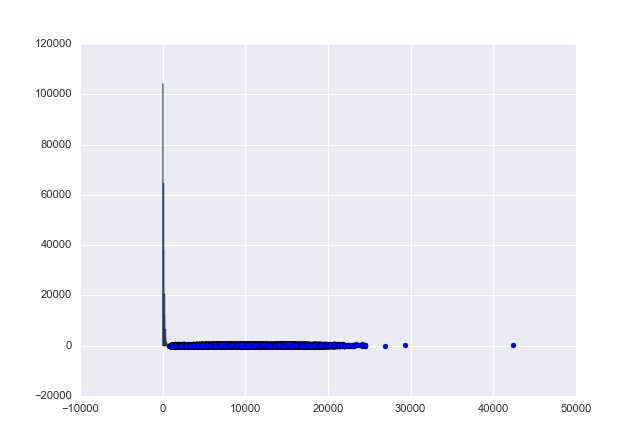

In [56]:
fig, ax = plt.subplots()
reduced_data['NumMonthsEmployed'].hist()

In [57]:
reduced_data[reduced_data['NumMonthsEmployed'].isnull()]

,Cancelled,BoolPriorProsperLoanee,DolLoanAmountRequested,BorrowerRate,NumMonthsTerm,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,NumMonthsEmployed,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,DolTotalBalanceOnPublicRecords,NumRealEstateTrades,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,PctBankcardUtil,NumTotalInquiries,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,
1161045,1,False,2000.0,0.1189,36,4166.6667,NaN,Self-employed,NaN,NaN,NaN,0,False,0,0,0,0,84,0,0,0,0,0.08,7,3286
1255866,1,False,15000.0,0.1385,36,7083.3333,0.42,Self-employed,NaN,NaN,NaN,0,False,1,0,0,4,2291,0,0,0,0,0.85,8,9687
1662531,1,False,15000.0,0.1605,60,0.0000,0.30,Other,NaN,NaN,NaN,0,False,1,0,0,1,1259,0,0,0,0,0.50,11,14372
1791984,0,False,27000.0,0.1199,36,22333.3333,0.40,Self-employed,NaN,NaN,NaN,0,False,1,0,0,3,1610,0,0,0,0,0.78,3,7755
1830179,0,False,5000.0,0.1305,36,10000.0000,NaN,Self-employed,NaN,NaN,NaN,0,False,1,0,0,0,741,0,0,0,0,0.61,14,3482
2008869,1,False,35000.0,0.1199,36,11666.6667,0.24,Self-employed,NaN,NaN,NaN,0,False,0,0,0,5,1636,0,0,0,0,0.60,3,12960
1841845,0,False,2000.0,0.2424,36,3000.0000,NaN,Employed,NaN,NaN,NaN,0,False,1,0,0,0,170,1,0,0,305,0.04,0,5868
2086050,1,False,14600.0,0.1570,60,6666.6667,0.16,Employed,NaN,NaN,NaN,0,False,1,0,0,0,714,0,1,0,0,0.80,10,6312
1931779,1,False,8000.0,0.1715,60,2791.6667,0.14,Employed,NaN,NaN,NaN,0,False,1,0,0,0,185,0,0,0,0,0.00,3,2712


In [58]:
reduced_data['NumMonthsEmployed'].isnull().sum()

18

In [63]:
reduced_data[reduced_data['DaysSinceFirstCredit']<10000]['NumMonthsEmployed'].mean()

99.25056015443026

<IPython.core.display.Javascript object>


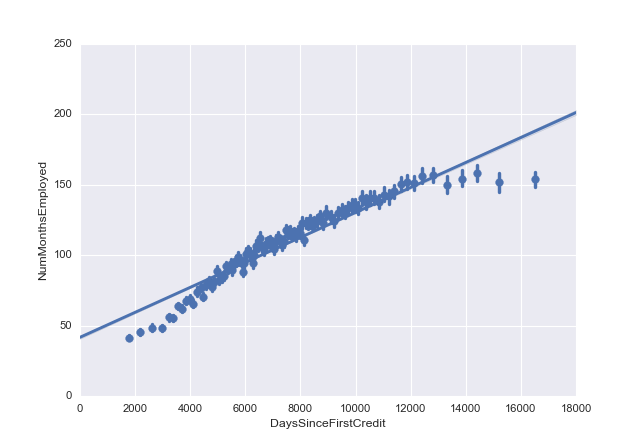

In [73]:
fig,ax = plt.subplots()
sns.regplot(reduced_data['DaysSinceFirstCredit'],reduced_data['NumMonthsEmployed'],x_bins=100)